# 1. Please take a look at the data types and summary of our variables.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plot
from sklearn.preprocessing import MaxAbsScaler


In [2]:
metadata = pd.read_csv('Metadata.csv')

In [3]:
metadata

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


In [4]:
climatedata = pd.read_csv('ClimateData.csv')

In [5]:
climatedata 

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [6]:
climatedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


# 2. Summarize the number of unique values in each column.


In [7]:
cnt= 0 
visited = []

In [8]:
for i in range(0, len(climatedata['floor_area'])):
    if climatedata['floor_area'][i] not in visited:
        visited.append(climatedata['floor_area'][i])
        
        cnt += 1


In [9]:
print("No of unique values:",
     cnt)

No of unique values: 20433


In [10]:
for i in range(0, len(climatedata['id'])):
    if climatedata['id'][i] not in visited:
        visited.append(climatedata['id'][i])
        
        cnt += 1

In [11]:
print("No of unique values:",
     cnt)

No of unique values: 88152


In [12]:
for i in range(0, len(climatedata['year_built'])):
    if climatedata['year_built'][i] not in visited:
        visited.append(climatedata['year_built'][i])
        
        cnt += 1

In [13]:
print("No of unique values:",
     cnt)

No of unique values: 89989


In [14]:
for i in range(0, len(climatedata['precipitation_inches'])):
    if climatedata['precipitation_inches'][i] not in visited:
        visited.append(climatedata['precipitation_inches'][i])
        
        cnt += 1

In [15]:
print("No of unique values:",
     cnt)

No of unique values: 90157


In [16]:
for i in range(0, len(climatedata['snowfall_inches'])):
    if climatedata['snowfall_inches'][i] not in visited:
        visited.append(climatedata['snowfall_inches'][i])
        
        cnt += 1

In [17]:
print("No of unique values:",
     cnt)

No of unique values: 90214


In [18]:
for i in range(0, len(climatedata['avg_temp'])):
    if climatedata['avg_temp'][i] not in visited:
        visited.append(climatedata['avg_temp'][i])
        
        cnt += 1

In [19]:
print("No of unique values:",
     cnt)

No of unique values: 90387


In [20]:
for i in range(0, len(climatedata['days_with_fog'])):
    if climatedata['days_with_fog'][i] not in visited:
        visited.append(climatedata['days_with_fog'][i])
        
        cnt += 1

In [21]:
print("No of unique values:",
     cnt)

No of unique values: 136183


In [22]:
for i in range(0, len(climatedata['site_eui'])):
    if climatedata['site_eui'][i] not in visited:
        visited.append(climatedata['site_eui'][i])
        
        cnt += 1

In [23]:
print("No of unique values:",
     cnt)

No of unique values: 152986


# 3. Check at descriptive statistics for the Dataset.

In [24]:
metadata.describe()

,id,building id
count,8,8
unique,8,8
top,building_class,building classification
freq,1,1


In [25]:
climatedata.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


# 4. Check the number of missing values.

In [26]:
climatedata.isna().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

# 5. Take care of missing data. You can decide to remove or use the imputation.

In [29]:
climatedata_final = climatedata.dropna()

In [31]:
climatedata_final

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
16,16,Commercial,74055.0,1949.0,16.59,0.0,56.972603,12.0,31.98
17,17,Commercial,128800.0,1926.0,16.59,0.0,56.972603,12.0,33.58
...,...,...,...,...,...,...,...,...,...
73151,73151,Residential,87458.0,1966.0,45.03,1.4,55.147541,261.0,96.64
73152,73152,Commercial,162157.0,2005.0,45.03,1.4,55.147541,261.0,249.78
73153,73153,Commercial,187027.0,2014.0,45.03,1.4,55.147541,261.0,24.43
73154,73154,Commercial,56988.0,2014.0,45.03,1.4,55.147541,261.0,9.52


# 6. Find and remove duplicate variables,


In [28]:
climatedata_final.drop_duplicates()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
16,16,Commercial,74055.0,1949.0,16.59,0.0,56.972603,12.0,31.98
17,17,Commercial,128800.0,1926.0,16.59,0.0,56.972603,12.0,33.58
...,...,...,...,...,...,...,...,...,...
73151,73151,Residential,87458.0,1966.0,45.03,1.4,55.147541,261.0,96.64
73152,73152,Commercial,162157.0,2005.0,45.03,1.4,55.147541,261.0,249.78
73153,73153,Commercial,187027.0,2014.0,45.03,1.4,55.147541,261.0,24.43
73154,73154,Commercial,56988.0,2014.0,45.03,1.4,55.147541,261.0,9.52


In [33]:
climatedata_final.duplicated()

1        False
2        False
3        False
16       False
17       False
         ...  
73151    False
73152    False
73153    False
73154    False
73155    False
Length: 29400, dtype: bool

# 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [34]:
climatedata_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29400 entries, 1 to 73155
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    29400 non-null  int64  
 1   building_class        29400 non-null  object 
 2   floor_area            29400 non-null  float64
 3   year_built            29400 non-null  float64
 4   precipitation_inches  29400 non-null  float64
 5   snowfall_inches       29400 non-null  float64
 6   avg_temp              29400 non-null  float64
 7   days_with_fog         29400 non-null  float64
 8   site_eui              29400 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.2+ MB


In [35]:
train_data = climatedata_final.copy()

In [36]:
train_data.building_class.unique()

array(['Commercial', 'Residential'], dtype=object)

In [37]:
train_data.building_class.nunique()

2

In [38]:
climate_df = pd.get_dummies(train_data['building_class'],prefix_sep='_',prefix='building_class')

In [39]:
climate_df

,building_class_Commercial,building_class_Residential
1,1,0
2,1,0
3,1,0
16,1,0
17,1,0
...,...,...
73151,0,1
73152,1,0
73153,1,0
73154,1,0


# 8. Create the boxplot and show the outlier.

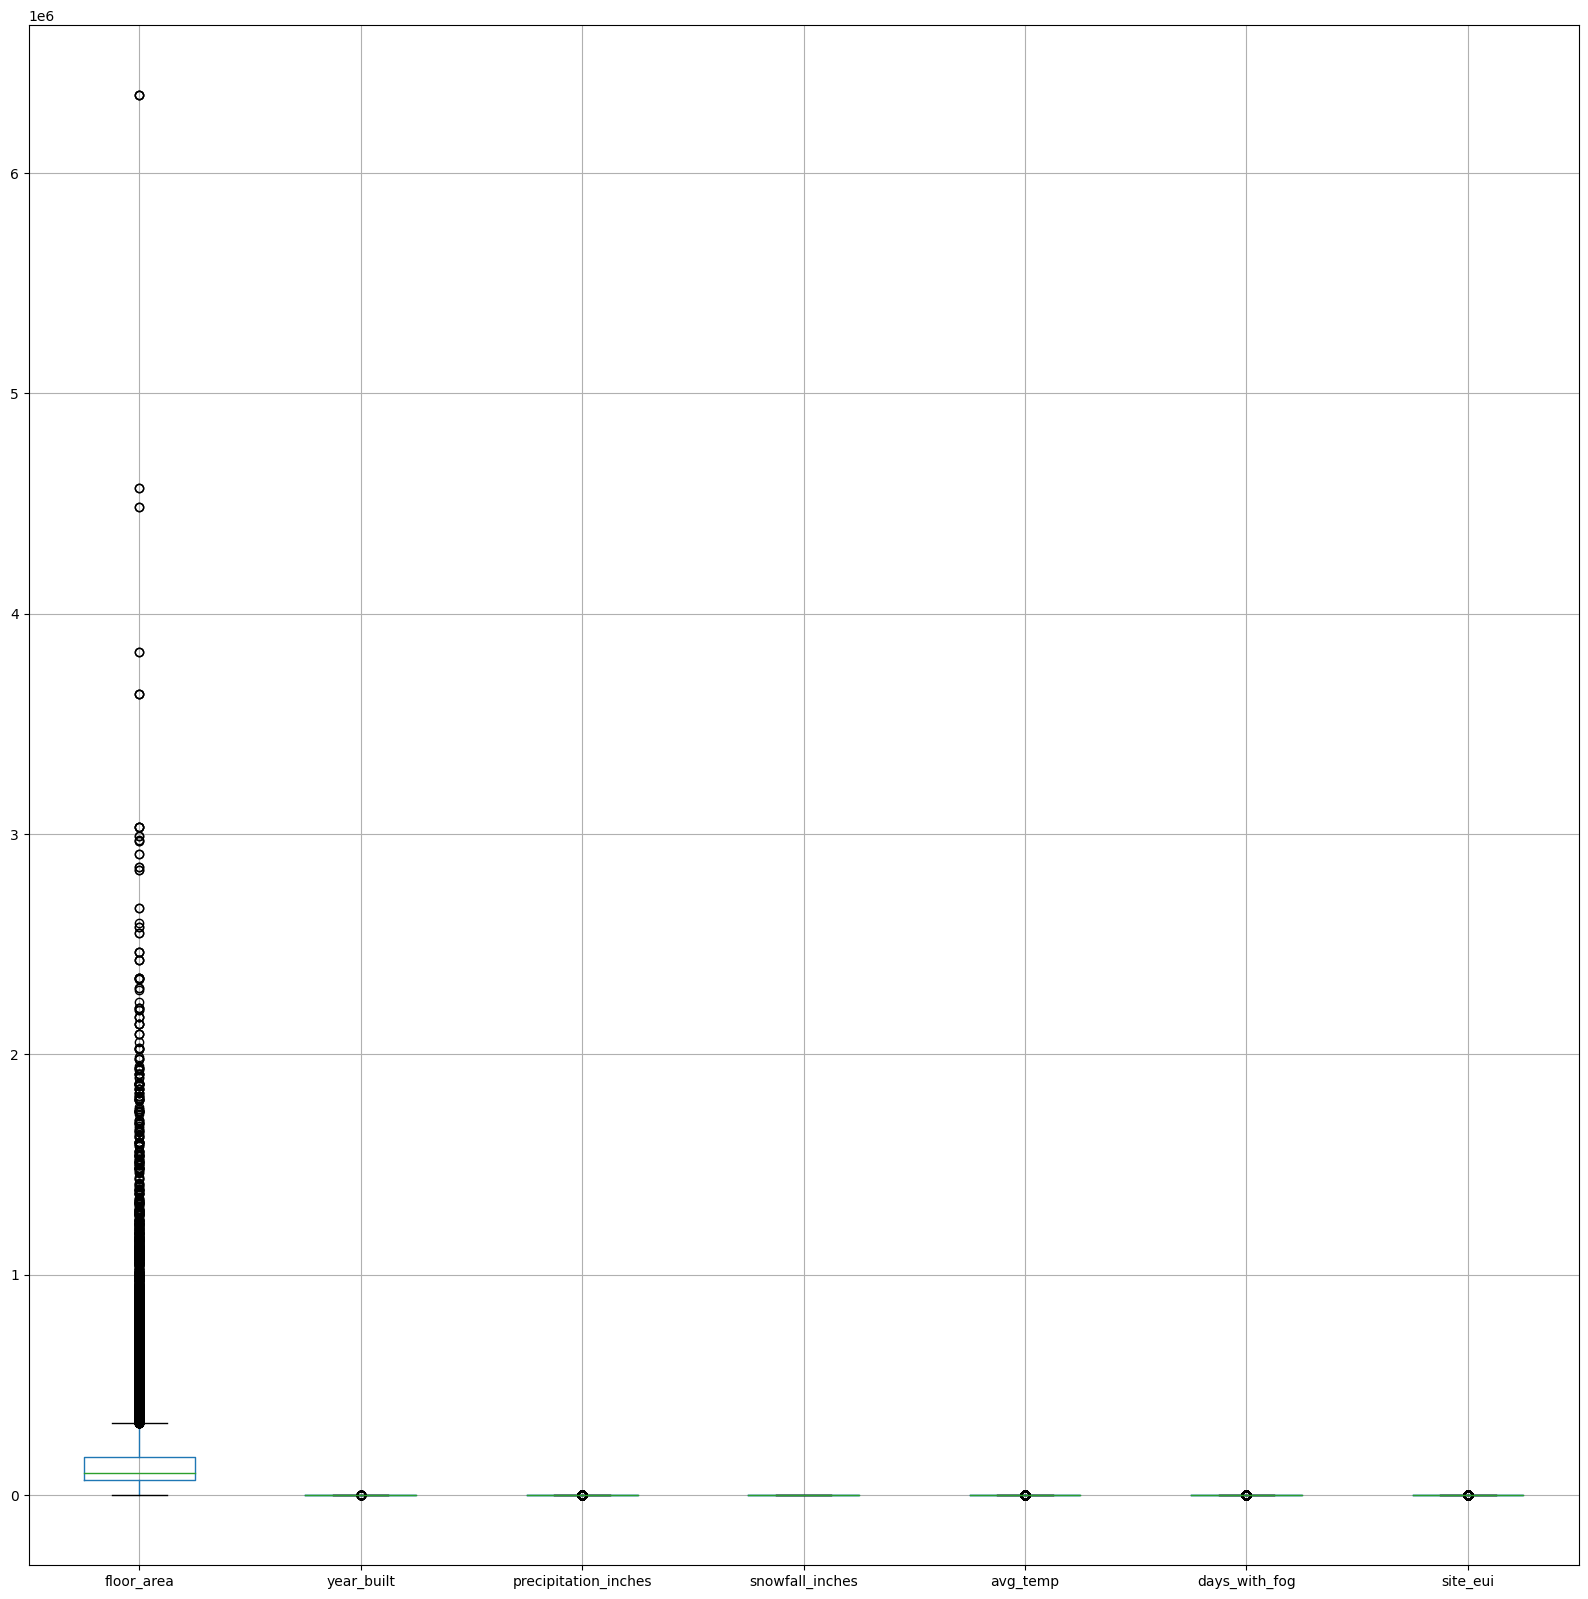

In [40]:
climatedata_final.boxplot(column=['floor_area','year_built','precipitation_inches','snowfall_inches','avg_temp','days_with_fog','site_eui'], figsize=(20,20))
plot.show()

# 9. Create the histogram and check the outliers.

In [41]:
climatedata_final.hist(column= ['floor_area','year_built','precipitation_inches','snowfall_inches','avg_temp','days_with_fog','site_eui'],figsize=(20,20))
climatedata_final.plot(kind='hist')
climatedata_final.plot.hist()

<AxesSubplot: ylabel='Frequency'>

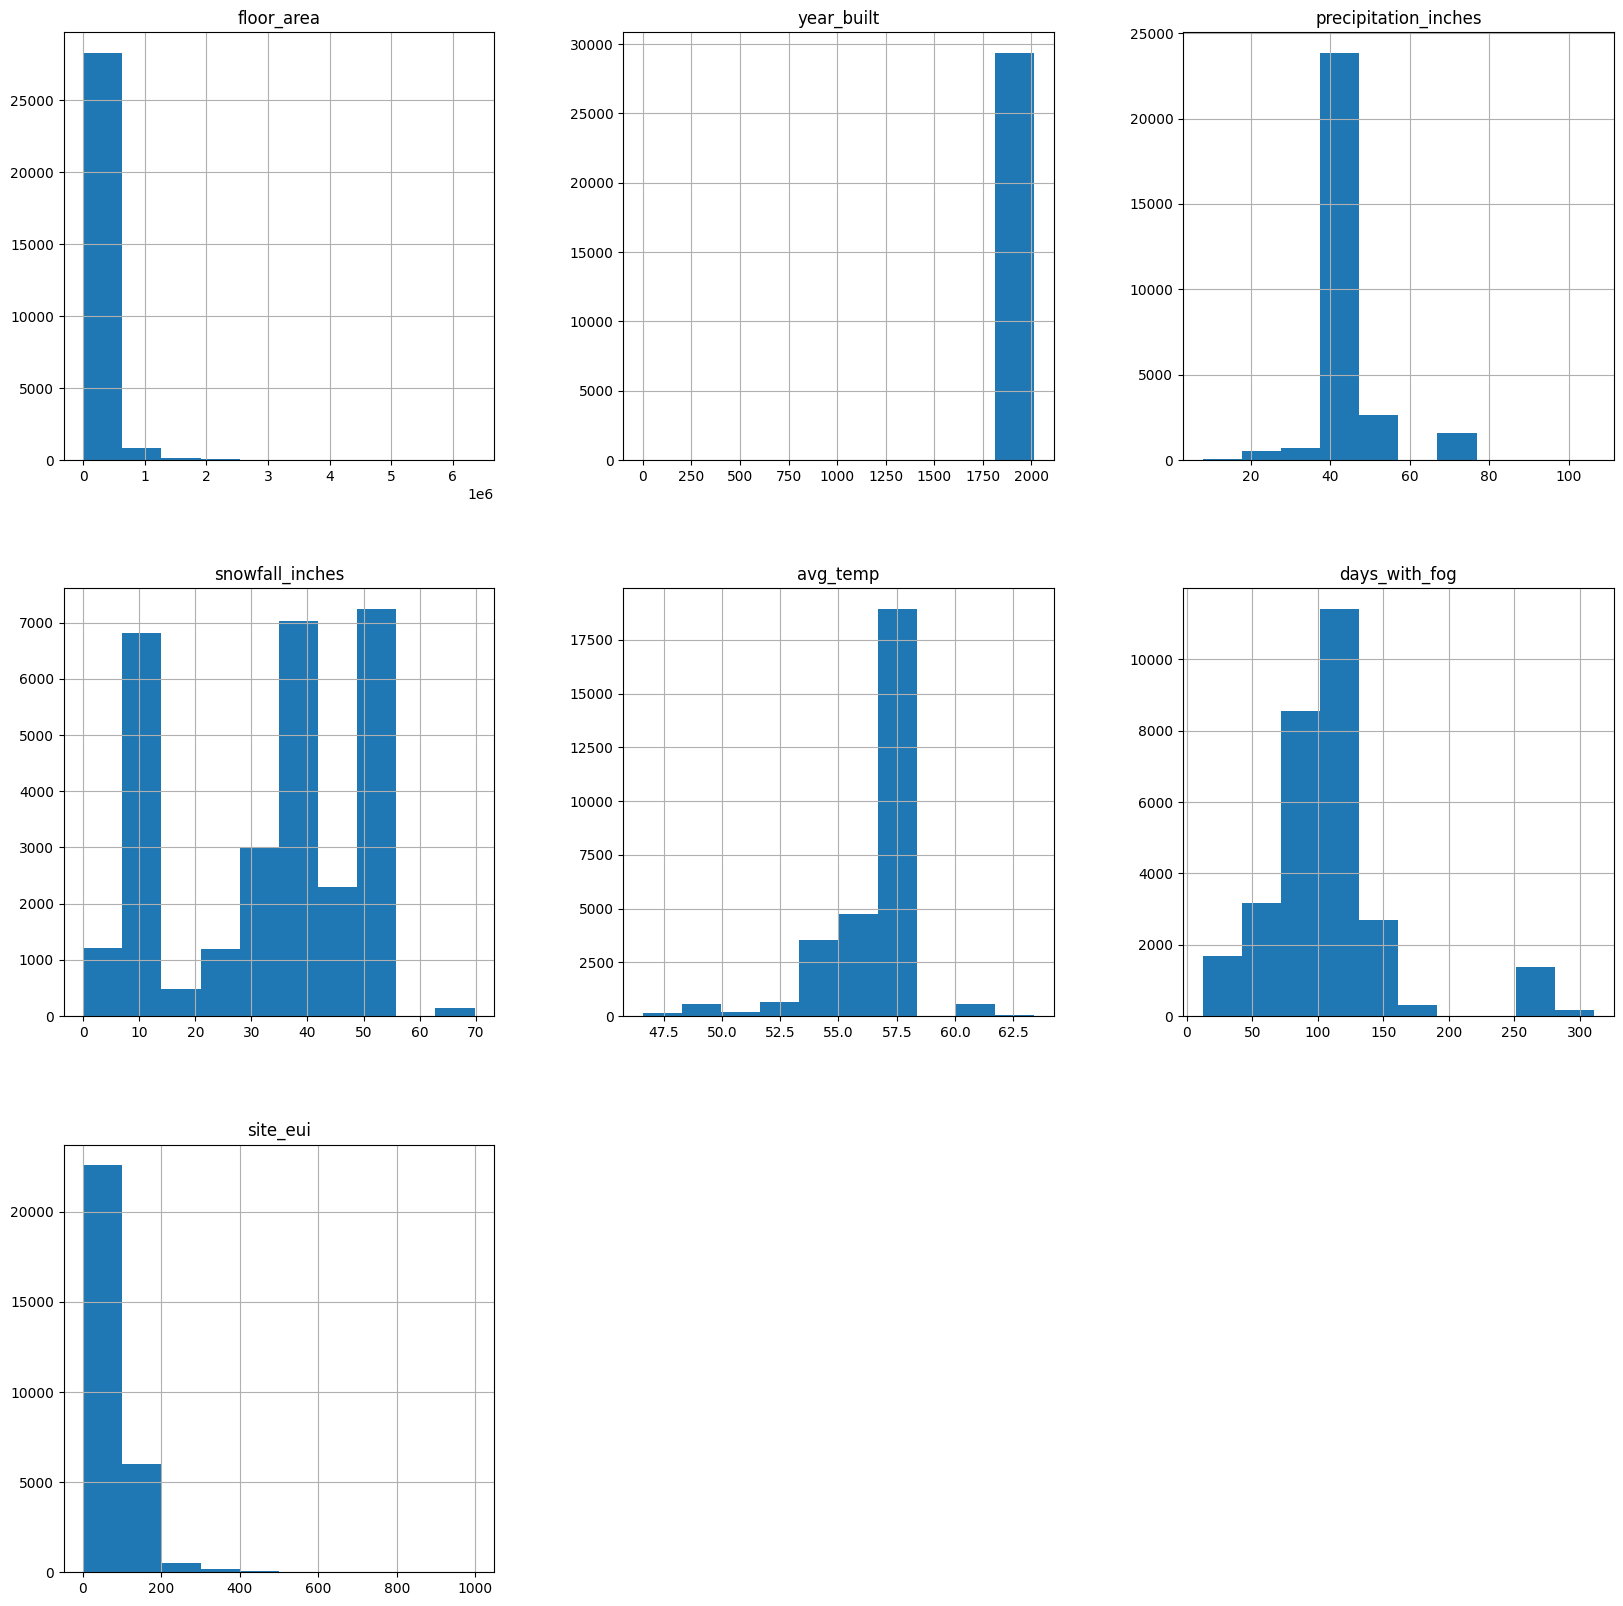

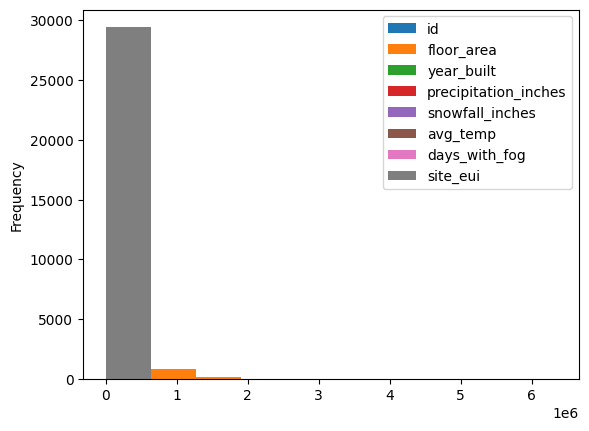

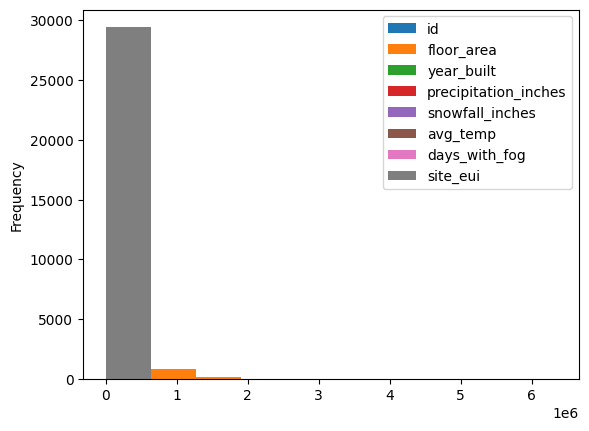

In [42]:
plot.show()

# 10. If feature scaling is needed, do it, please.